In [1]:
import pandas as pd
from sklearn.datasets import fetch_openml
import sys

sys.path.insert(0, "..")
from check_data_consistency import DataConsistencyChecker

In [2]:
data = fetch_openml('hypothyroid', version=1)
data_df = pd.DataFrame(data.data, columns=data.feature_names)
display(data_df.head())

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source
0,41.0,F,f,f,f,f,f,f,f,f,...,2.5,t,125.0,t,1.14,t,109.0,f,NaN,SVHC
1,23.0,F,f,f,f,f,f,f,f,f,...,2.0,t,102.0,f,NaN,f,NaN,f,NaN,other
2,46.0,M,f,f,f,f,f,f,f,f,...,NaN,t,109.0,t,0.91,t,120.0,f,NaN,other
3,70.0,F,t,f,f,f,f,f,f,f,...,1.9,t,175.0,f,NaN,f,NaN,f,NaN,other
4,70.0,F,f,f,f,f,f,f,f,f,...,1.2,t,61.0,t,0.87,t,70.0,f,NaN,SVI


In [3]:
dc = DataConsistencyChecker(verbose=0) 
dc.init_data(data_df)
dc.check_data_quality()

ret = dc.summarize_patterns_and_exceptions()
display(ret)


Data consistency check complete.
Analysed 3,772 rows, 27 columns
Executed 155 tests.

Patterns without Exceptions:
Found 25 patterns without exceptions
8 tests (5.16% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 35 patterns with exceptions
17 tests (10.97% of tests) flagged at least one exception each.
Flagged 127 row(s) with at least one exception.
Flagged 14 column(s) with at least one exception.


,Test ID,Number Patterns without Exceptions,Number Patterns with Exceptions
0,MATCHED_MISSING,,1
1,SAME_VALUES,,1
2,POSITIVE,6,
3,NUMBER_DECIMALS,2,
4,RARE_DECIMALS,,2
5,UNUSUAL_ORDER_MAGNITUDE,,3
6,FEW_NEIGHBORS,,1
7,VERY_SMALL,,2
8,VERY_LARGE,,3
9,NON_ZERO,6,


Displaying results for tests: 'SAME_VALUES', 'RARE_DECIMALS', 'FEW_NEIGHBORS', 'SIMILAR_WRT_RATIO', 'BINARY_SAME', 'LARGE_GIVEN_VALUE', 'DECISION_TREE_CLASSIFIER'

....................................................................................................


### SAME_VALUES

### Column(s): "T4U_measured" AND "FTI_measured"

**Issue ID**: 1

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: The values in "FTI_measured" are consistently the same as those in "T4U_measured", with exceptions.

**Number of exceptions**: 2 (0.0530% of rows)

**Examples of values NOT flagged**:

,T4U_measured,FTI_measured
501,t,t
1623,t,t
2104,t,t
2163,t,t
2710,t,t
2831,t,t
3086,t,t
3442,t,t
3602,t,t
3692,t,t


**Flagged values**:

,T4U_measured,FTI_measured
765,f,t
1515,f,t


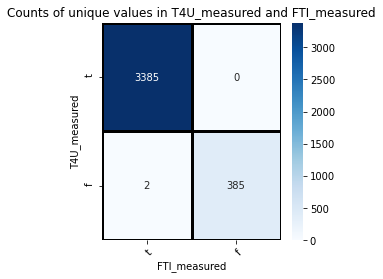

....................................................................................................


### RARE_DECIMALS

### Column(s): TT4

**Issue ID**: 2

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: The column consistently contains values with one of '' after the decimal point.

**Number of exceptions**: 5 (0.1326% of rows)

**Examples of values NOT flagged**:

,TT4
200,93.0
1233,102.0
1460,139.0
2138,136.0
2208,107.0
2528,85.0
3080,139.0
3178,142.0
3690,157.0
3731,124.0


**Flagged values**:

,TT4
667,5.8
1099,4.8
1649,5.8
3039,9.5
3565,2.9


### Column(s): FTI

**Issue ID**: 3

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: The column consistently contains values with one of '' after the decimal point.

**Number of exceptions**: 7 (0.1856% of rows)

**Examples of values NOT flagged**:

,FTI
385,131.0
711,122.0
729,95.0
827,140.0
1437,105.0
1689,82.0
1874,92.0
2902,196.0
2948,100.0
3033,81.0


**Flagged values**:

,FTI
88,8.9
1099,5.4
2103,7.6
3180,8.4
3449,8.5
3565,2.8
3639,9.1


....................................................................................................


### FEW_NEIGHBORS

### Column(s): TT4

**Issue ID**: 7

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: The test marked any values more than 42.800 away from both the next smallest and next largest values<br>in the column.

**Number of exceptions**: 1 (0.0265% of rows)

**Examples of values NOT flagged**:

,TT4
200,93.0
1746,141.0
2147,143.0
2237,89.0
2534,107.0
2788,70.0
2883,69.0
2999,91.0
3122,89.0
3176,121.0


**Flagged values**:

,TT4
3258,372.0


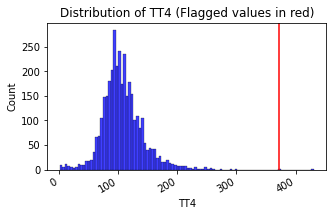

....................................................................................................


### SIMILAR_WRT_RATIO

### Column(s): "TT4" AND "FTI"

**Issue ID**: 16

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: "TT4" and "FTI" have consistently similar values in terms of their ratio, with exceptions.

**Number of exceptions**: 18 (0.4772% of rows)

**Examples of values NOT flagged**:

,TT4,FTI
218,113.0,125.0
528,97.0,112.0
616,144.0,123.0
782,107.0,100.0
1642,130.0,153.0
1847,112.0,103.0
1930,121.0,121.0
2157,105.0,129.0
2211,78.0,70.0
3344,103.0,118.0


**Examples of flagged values**:

,TT4,FTI
740,204.0,100.0
1509,65.0,137.0
1515,46.0,104.0
1898,50.0,161.0
1961,239.0,113.0
2076,61.0,124.0
2181,72.0,145.0
2191,59.0,119.0
2288,44.0,118.0
2431,43.0,105.0


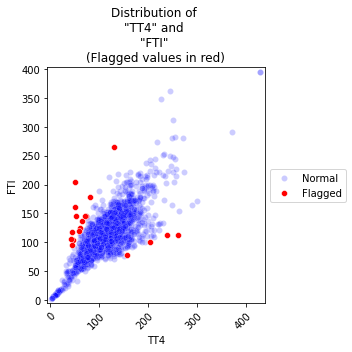

....................................................................................................


### BINARY_SAME

### Column(s): "T4U_measured" AND "FTI_measured"

**Issue ID**: 18

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: The columns consistently have the same value, with exceptions.

**Number of exceptions**: 2 (0.0530% of rows)

**Examples of values NOT flagged**:

,T4U_measured,FTI_measured
0,t,t
1,f,f
2,t,t
3,f,f


**Flagged values**:

,T4U_measured,FTI_measured
765,f,t
1515,f,t


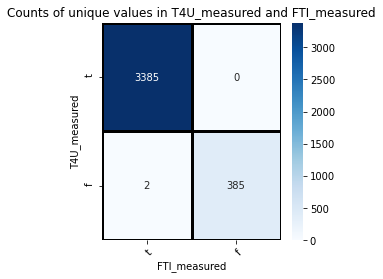

....................................................................................................


### LARGE_GIVEN_VALUE

### Column(s): "referral_source" AND "TT4"

**Issue ID**: 26

Unusual values were found.<br>

**Description**: "TT4" contains very large values given the specific value in "referral_source" (Values that are<br>large given any value of "referral_source" are not flagged by this test.).

**Number of exceptions**: 1 (0.0265% of rows)

**Examples of values NOT flagged**:

,referral_source,TT4
200,other,93.0
1746,other,141.0
2147,other,143.0
2237,other,89.0
2536,STMW,54.0
2790,SVI,83.0
2884,SVHC,106.0
3000,SVI,157.0
3123,other,168.0
3177,other,120.0


**Flagged values**:

,referral_source,TT4
2402,SVI,240.0


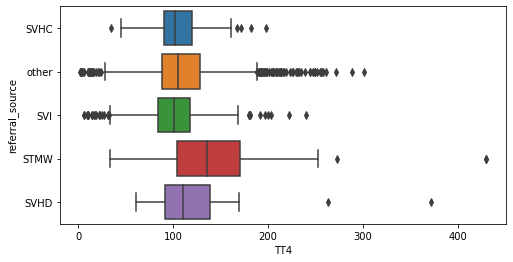

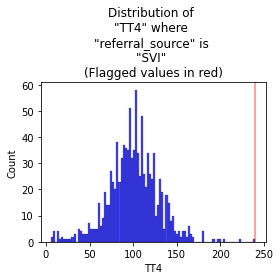

### Column(s): "referral_source" AND "FTI"

**Issue ID**: 27

Unusual values were found.<br>

**Description**: "FTI" contains very large values given the specific value in "referral_source" (Values that are<br>large given any value of "referral_source" are not flagged by this test.).

**Number of exceptions**: 1 (0.0265% of rows)

**Examples of values NOT flagged**:

,referral_source,FTI
384,other,112.0
709,other,125.0
728,other,105.0
826,other,124.0
1435,other,101.0
1686,SVI,120.0
1871,other,121.0
2902,other,196.0
2948,other,100.0
3034,SVHC,102.0


**Flagged values**:

,referral_source,FTI
2422,SVHC,217.0


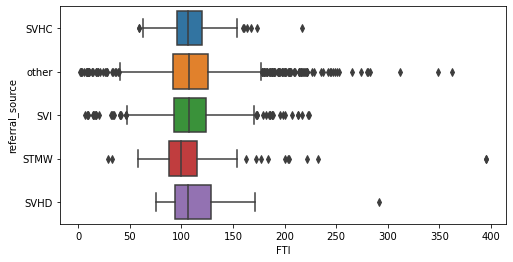

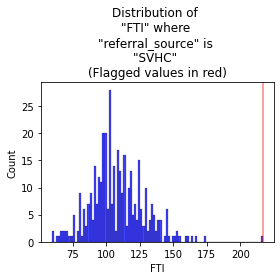

### Column(s): "sex" AND "TT4"

**Issue ID**: 28

Unusual values were found.<br>

**Description**: "TT4" contains very large values given the specific value in "sex" (Values that are large given any<br>value of "sex" are not flagged by this test.).

**Number of exceptions**: 4 (0.1060% of rows)

**Examples of values NOT flagged**:

,sex,TT4
201,M,125.0
1234,F,121.0
1461,F,118.0
2139,M,94.0
2209,F,117.0
2529,M,100.0
3080,F,139.0
3178,M,142.0
3689,F,87.0
3730,M,95.0


**Flagged values**:

,sex,TT4
134,M,225.0
723,M,232.0
1215,M,246.0
1671,M,226.0


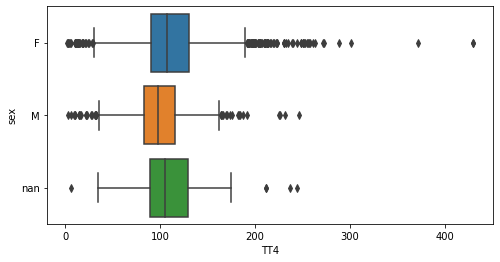

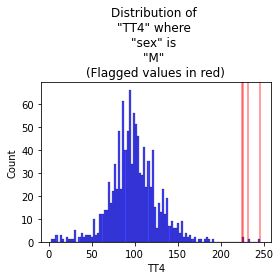

### Column(s): "sex" AND "T4U"

**Issue ID**: 29

Unusual values were found.<br>

**Description**: "T4U" contains very large values given the specific value in "sex" (Values that are large given any<br>value of "sex" are not flagged by this test.).

**Number of exceptions**: 2 (0.0530% of rows)

**Examples of values NOT flagged**:

,sex,T4U
385,M,0.98
711,F,0.79
729,F,1.09
829,M,0.88
1437,F,1.13
1690,F,0.93
1875,F,1.07
2931,F,0.98
3012,F,1.07
3280,F,1.07


**Flagged values**:

,sex,T4U
134,M,1.68
3362,nan,1.75


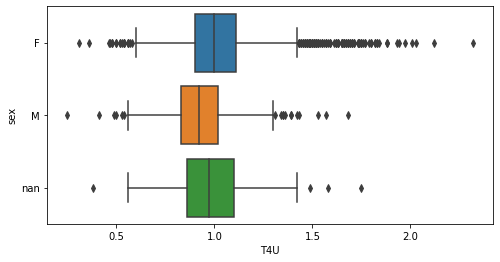

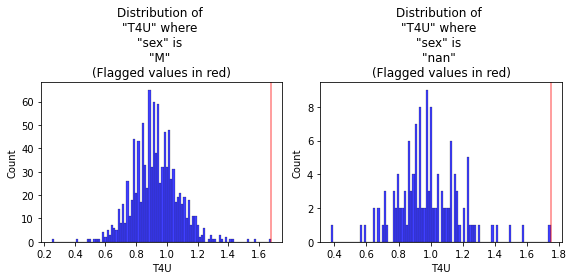

### Column(s): "sick" AND "T3"

**Issue ID**: 30

Unusual values were found.<br>

**Description**: "T3" contains very large values given the specific value in "sick" (Values that are large given any<br>value of "sick" are not flagged by this test.).

**Number of exceptions**: 5 (0.1326% of rows)

**Examples of values NOT flagged**:

,sick,T3
395,f,3.6
901,f,0.8
1295,f,1.5
2016,f,2.1
2242,f,1.7
2582,f,2.1
3245,f,0.6
3645,f,3.1
3704,f,2.5
3748,f,0.6


**Flagged values**:

,sick,T3
12,t,3.8
1037,t,3.7
2376,t,3.9
2563,t,3.8
3217,t,4.3


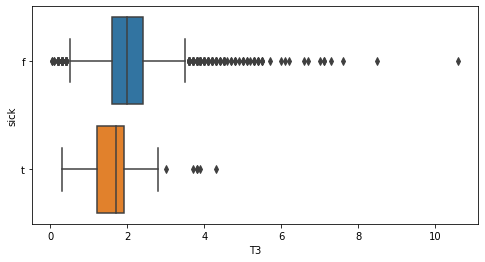

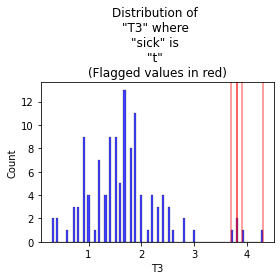

### Column(s): "sick" AND "FTI"

**Issue ID**: 31

Unusual values were found.<br>

**Description**: "FTI" contains very large values given the specific value in "sick" (Values that are large given any<br>value of "sick" are not flagged by this test.).

**Number of exceptions**: 1 (0.0265% of rows)

**Examples of values NOT flagged**:

,sick,FTI
384,f,112.0
709,f,125.0
728,f,105.0
826,f,124.0
1435,f,101.0
1686,f,120.0
1871,f,121.0
2902,f,196.0
2948,f,100.0
3034,f,102.0


**Flagged values**:

,sick,FTI
2563,t,222.0


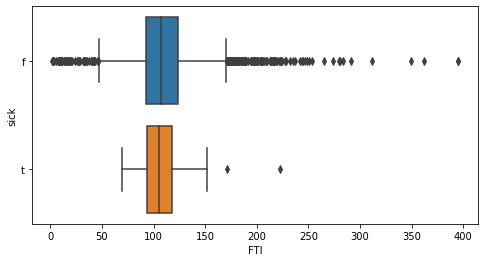

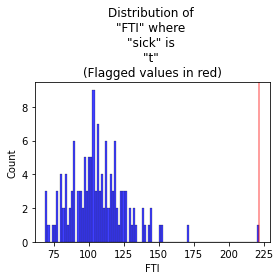

....................................................................................................


### DECISION_TREE_CLASSIFIER

### Column(s): "T3_measured" AND "T4U_measured" AND "TSH_measured" AND "TT4_measured"

**Issue ID**: 34

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**:

The values in column "TT4_measured" are consistently predictable from ['T3_measured', 'T4U_measured', 'TSH_measured'] based using a decision tree with the following rules: <br>|--- T4U_measured is not f<br>|   |--- class: t<br>|--- T4U_measured is f<br>|   |--- T3_measured is not f<br>|   |   |--- TSH_measured is not f<br>|   |   |   |--- class: t<br>|   |   |--- TSH_measured is f<br>|   |   |   |--- class: f<br>|   |--- T3_measured is f<br>|   |   |--- class: f<br>, with exceptions.

**Number of exceptions**: 17 (0.4507% of rows)

**Examples of values NOT flagged**:

,T3_measured,T4U_measured,TSH_measured,TT4_measured,PREDICTION
0,t,t,t,t,t
1,t,f,t,t,t
2,f,t,t,t,t
3,t,f,t,t,t
4,t,t,t,t,t
39,f,f,f,f,f
54,t,f,f,f,f
66,f,f,f,f,f
72,f,f,f,f,f
92,f,f,f,f,f


**Examples of flagged values**:

,T3_measured,T4U_measured,TSH_measured,TT4_measured,PREDICTION
324,t,t,t,f,t
400,t,f,t,f,t
538,t,f,f,t,f
595,f,f,f,t,f
765,t,f,t,f,t
1026,t,f,f,t,f
1091,f,f,t,t,f
1143,t,f,t,f,t
1239,t,f,t,f,t
1531,t,f,t,f,t


In [4]:
# Looking at the list of patterns and exceptions found, the interesting ones
# may be the following. We look at them in more detail

dc.display_detailed_results(
    test_id_list=['SAME_VALUES', 'RARE_DECIMALS', 'FEW_NEIGHBORS', 'SIMILAR_WRT_RATIO', 'BINARY_SAME',
                 'LARGE_GIVEN_VALUE', 'DECISION_TREE_CLASSIFIER'])